# Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [35]:
data = pd.read_csv('../data/interim/energy_weather_features_train.csv',index_col=0)

In [36]:
data.head()

,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed,weather_broken clouds,weather_drizzle,weather_few clouds,...,weather_overcast clouds,weather_proximity thunderstorm,weather_scattered clouds,weather_sky is clear,weather_snow,n_humidity,n_pressure,n_temperature,n_wind_direction,n_wind_speed
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 01:00:00,10445.0,68.0,1020.0,269.72,overcast clouds,290.0,6.0,0,0,0,...,1,0,0,0,0,0.648352,0.051448,-1.192115,0.805556,1.008900
2012-12-31 02:00:00,9897.0,73.0,1020.0,269.05,overcast clouds,290.0,6.0,0,0,0,...,1,0,0,0,0,0.703297,0.051448,-1.252274,0.805556,1.008900
2012-12-31 03:00:00,9538.0,68.0,1021.0,268.53,overcast clouds,280.0,6.0,0,0,0,...,1,0,0,0,0,0.648352,0.151079,-1.298964,0.777778,1.008900
2012-12-31 04:00:00,9333.0,79.0,1022.0,267.83,overcast clouds,280.0,8.0,0,0,0,...,1,0,0,0,0,0.769231,0.250710,-1.361817,0.777778,1.655296
2012-12-31 05:00:00,9275.0,85.0,1023.0,266.77,overcast clouds,270.0,6.0,0,0,0,...,1,0,0,0,0,0.835165,0.350341,-1.456994,0.750000,1.008900


In [37]:
data.index = pd.to_datetime(data.index)

In [38]:
data.dtypes

energy                             float64
humidity                           float64
pressure                           float64
temperature                        float64
weather                             object
wind_direction                     float64
wind_speed                         float64
weather_broken clouds                int64
weather_drizzle                      int64
weather_few clouds                   int64
weather_fog                          int64
weather_haze                         int64
weather_heavy intensity rain         int64
weather_heavy snow                   int64
weather_light intensity drizzle      int64
weather_light rain                   int64
weather_light snow                   int64
weather_mist                         int64
weather_moderate rain                int64
weather_other                        int64
weather_overcast clouds              int64
weather_proximity thunderstorm       int64
weather_scattered clouds             int64
weather_sky

## Check periodicity

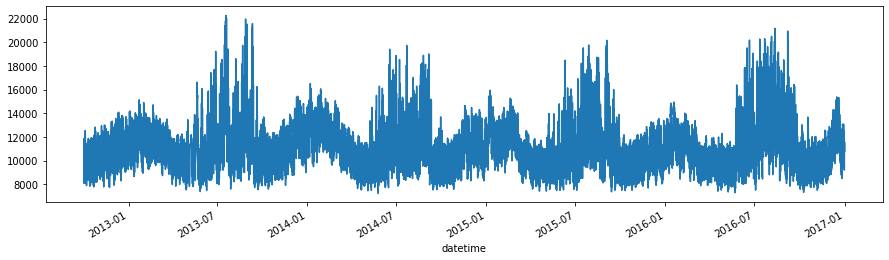

In [39]:
plt.figure(figsize=(15,4))
data['energy'].plot()
plt.show()

The energy data contain trend periodicity from daily to yearly basis.

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


Text(0.5, 1.0, 'Vertical line every 6 months')

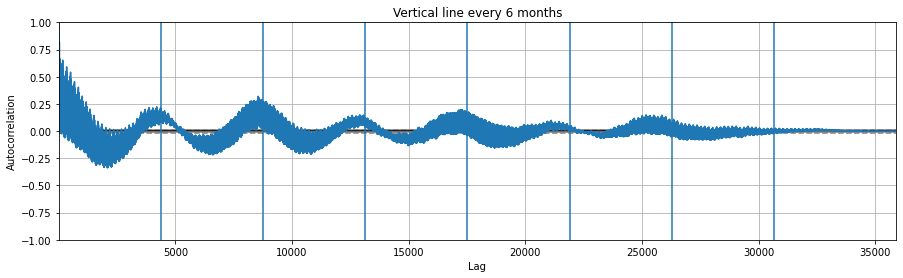

In [40]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['energy'])

v = np.array([1,2,3,4,5,6,7])
vtime = v*4380
for xc in vtime:
    plt.axvline(x=xc)
    
plt.title('Vertical line every 6 months')

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


Text(0.5, 1.0, 'Vertical line every 1 week')

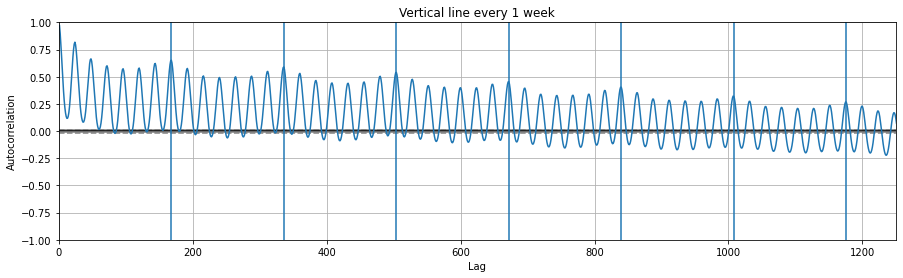

In [41]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['energy']).set_xlim([0,1250])

v = np.array([1,2,3,4,5,6,7])
vtime = v*168
for xc in vtime:
    plt.axvline(x=xc)
    
plt.title('Vertical line every 1 week')

/Users/gritkupgan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


Text(0.5, 1.0, 'Vertical line every 24 hours')

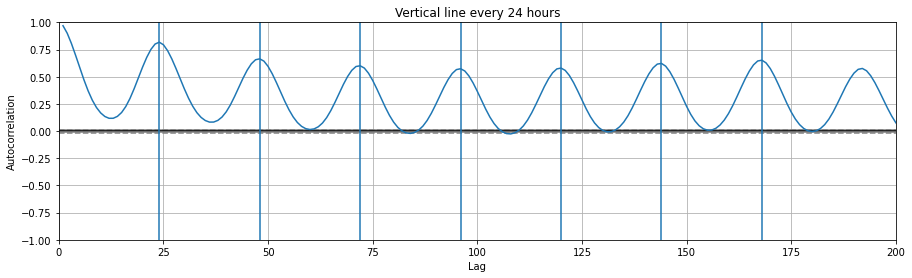

In [42]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['energy']).set_xlim([0,200])

v = np.array([1,2,3,4,5,6,7])
vtime = v*24
for xc in vtime:
    plt.axvline(x=xc)
    
plt.title('Vertical line every 24 hours')

The energy data appear to be periodic with multiple timeframes from 24 hours, 1 week, and 6 months.